# Exploratory work for the [IAFlash](https://entrepreneur-interet-general.etalab.gouv.fr/defis/2019/iaflash.html) challenge

## Downloading, cleaning and processing data from an open dataset

Will work with the open [Stanford Cars Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html) containing 196 classes of American cars, with about 8000 images per class for training.  
The data must be downloaded and present in the `pathToDataDir` directory.

### Imports

In [4]:
import os
HOME = os.path.expanduser('~/')
HOST = os.uname()[1]
if HOST == 'Arthurs-MacBook-Pro.local':
    os.chdir(os.path.join(HOME, 'Documents/GitHub/EIG3_IAFlash/')) # @home
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
import numpy as np
import time

from PIL import Image

from IAFlash.helpers_local import DataHandler, ImageWorker # needs correct working directory

### Variables

In [10]:
# data
if HOST == 'Arthurs-MacBook-Pro.local':
    pathToDataDir = os.path.join(HOME, 'Documents/Dropbox/Transit/EIG3_IAFlash/')
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
ptValidationInTest = 0.2
dh = DataHandler(pathToDataDir, ptValidationInTest)

# image processing
# edge, bw = 2**7, False # for (smallest) MobileNet
# edge, bw = 299, False # for InceptionV3
edge, bw = 2**7, True # for light data
resampleFilter = Image.NEAREST

# seed
seed = 7
np.random.seed(seed)

### Data manipulations

Here we read the raw images, cast each of them to a basic formatted instance, and save them with a directory structure that will help us using the `keras.preprocessing.image.ImageDataGenerator` (namely one class per subdirectory).

before:


after:


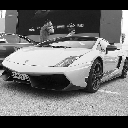

In [11]:
# example of basic formatting
i = np.random.choice(dh.n,1)[0]
iw = ImageWorker(dh,i)
iw.buildPatch(edge=edge, bw=bw, resampleFilter=resampleFilter)
print('before:')
display(iw.image)
print('after:')
display(iw.patch)

In [12]:
# apply this to full dataset
tic = time.time()
for i in range(dh.n):

    # load image, create patch, and save
    iw = ImageWorker(dh,i)
    iw.buildPatch(edge=edge, bw=bw, resampleFilter=resampleFilter)  
    iw.savePatch()
    
print('done: took {}s'.format(np.round(time.time()-tic,2)))

done: took 174.34s
